Accuracy: 0.7576
Precision: 0.7257
Recall: 0.8282
F1 Score: 0.7736
Log Loss: 1.5071
ROC-AUC: 0.8256


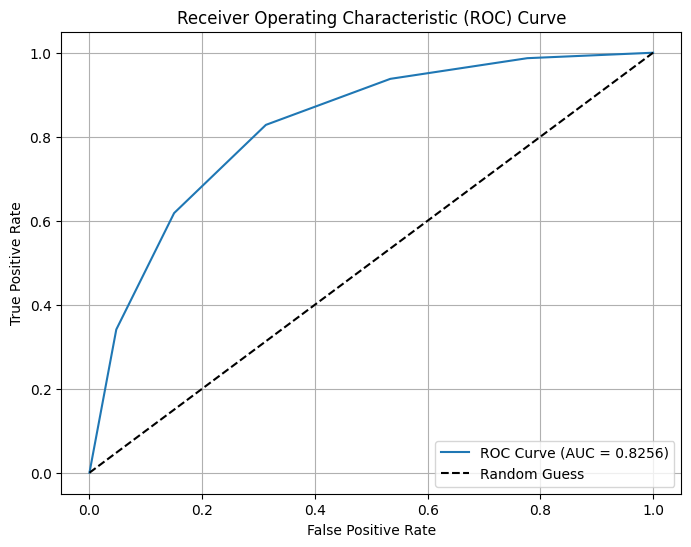

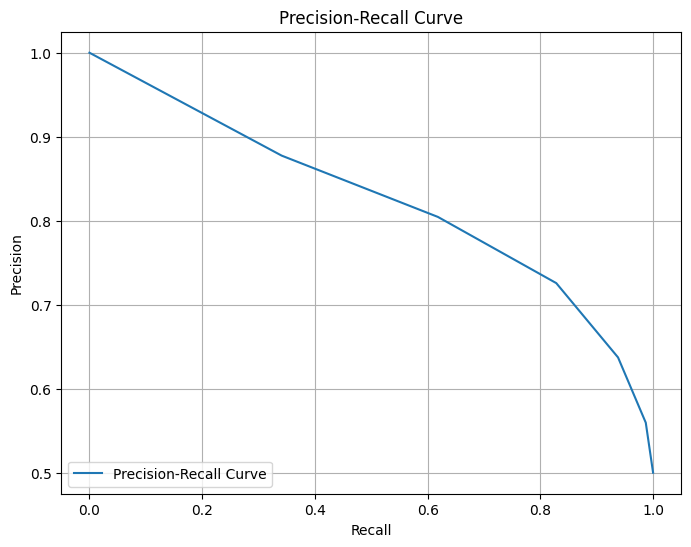

In [3]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Function to preprocess text
def preprocess_text(text):
    # Removes the HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Removes all special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Converts it to lowercase
    text = text.lower()
    # Removes all extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Loads the dataset
file_path = 'IMDB Dataset.csv'
data = pd.read_csv(file_path)

# Preprocesses the review text
data['review'] = data['review'].apply(preprocess_text)

# Converts the sentiment labels into binary values
# 0 for negative and 1 for positive
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment']) 

# Splits the dataset into training and testing sets
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizes the reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Trains a KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train_tfidf, y_train)

# Makes predictions
y_pred = knn.predict(X_test_tfidf)
y_pred_proba = knn.predict_proba(X_test_tfidf)[:, 1]

# Calculates the performance metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Log Loss": log_loss(y_test, y_pred_proba),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}

# Prints the performance metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plots the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {metrics['ROC-AUC']:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plots the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()
